## In this notebook I will train a linear regression model to predict the usage frequency of a drug in our dataset depending on multiple features like personality, country, ethicity etc ...

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../csv_parser/drug_consumption_cleaned.csv')


df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [68]:
drug_cols = ['Alcohol', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df = df.replace({
    'Never Used': 0,
    'Used over a Decade Ago': 1,
    'Used in Last Decade': 2,
    'Used in Last Year': 3,
    'Used in Last Month': 4,
    'Used in Last Week': 5,
    'Used in Last Day': 6
})

df.head()


C:\Users\Admin Stagiaire\AppData\Local\Temp\ipykernel_10352\1154542870.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


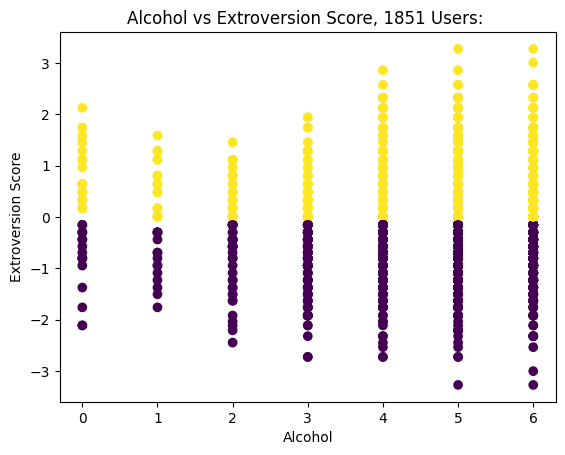

In [74]:
# In this chart, we can see the relationship between the extroversion score and the alcohol consumption.
# We can witness that there is no clear relationship between the two variables.
# In other words, the extroversion score does not have a significant impact on the alcohol consumption.
alcohol_users_count = df[df["Alcohol"] > 0].shape[0]
plt.scatter(df["Alcohol"], df["Escore"], c=df["Escore"] > 0, cmap='viridis')
plt.xlabel("Alcohol")
plt.ylabel("Extroversion Score")
plt.title(f"Alcohol vs Extroversion Score, {alcohol_users_count} Users: ")
plt.show()

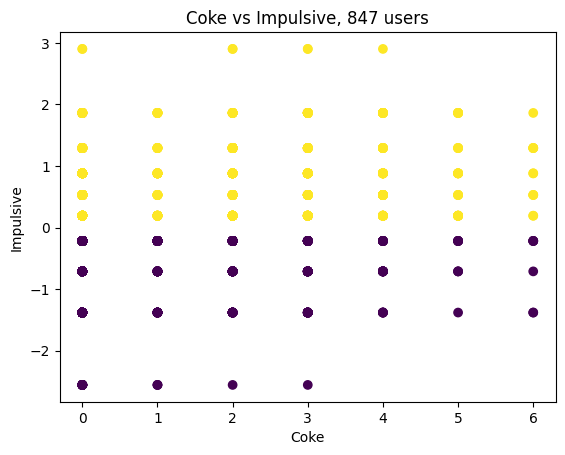

In [72]:
# In this chart however, we can see the relationship between the impulsive score and the cocaine consumption.
# We can witness that there is a clear relationship between the two variables.
coke_users_count = df[df["Coke"] > 0].shape[0]
plt.scatter(df["Coke"], df["Impulsive"], c=df["Impulsive"] > 0, cmap='viridis')
plt.xlabel("Coke")
plt.ylabel("Impulsive")
plt.title(f"Coke vs Impulsive, {coke_users_count} users")
plt.show()